In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [296]:
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop
0,Sanarpatti,red,75.0,50.0,100.0,6.5,1000.0,20.0,corn
1,Sanarpatti,red,80.0,50.0,100.0,6.5,1000.0,20.0,corn
2,T_Krishnapuram,red,85.0,50.0,100.0,6.5,1000.0,20.0,rice
3,T_Krishnapuram,red,90.0,50.0,100.0,6.5,1000.0,20.0,rice
4,T_Krishnapuram,red,95.0,50.0,100.0,6.5,1000.0,20.0,corn


In [297]:
df.rename(columns = {'District_Name':'village'},inplace = True)

In [298]:
df.head()

,village,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop
0,Sanarpatti,red,75.0,50.0,100.0,6.5,1000.0,20.0,corn
1,Sanarpatti,red,80.0,50.0,100.0,6.5,1000.0,20.0,corn
2,T_Krishnapuram,red,85.0,50.0,100.0,6.5,1000.0,20.0,rice
3,T_Krishnapuram,red,90.0,50.0,100.0,6.5,1000.0,20.0,rice
4,T_Krishnapuram,red,95.0,50.0,100.0,6.5,1000.0,20.0,corn


# Basic Checks

In [299]:
df.tail()

,village,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop
899,E_Perumalpatti,red,105.0,50.0,45.0,7.0,900.0,20.0,blackeyedpeas
900,E_Perumalpatti,black,110.0,50.0,45.0,7.0,900.0,20.0,blackeyedpeas
901,E_Perumalpatti,alluvial,115.0,50.0,45.0,7.0,900.0,20.0,blackeyedpeas
902,E_Perumalpatti,red,120.0,50.0,45.0,7.0,900.0,20.0,blackeyedpeas
903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   village      903 non-null    object 
 1   Soil_color   903 non-null    object 
 2   Nitrogen     903 non-null    float64
 3   Phosphorus   903 non-null    float64
 4   Potassium    903 non-null    float64
 5   pH           903 non-null    float64
 6   Rainfall     903 non-null    float64
 7   Temperature  903 non-null    float64
 8   Crop         903 non-null    object 
dtypes: float64(6), object(3)
memory usage: 63.7+ KB


In [301]:
df.shape

(904, 9)

In [302]:
df.describe()

,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature
count,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000
mean,103.986711,53.532669,57.198228,6.726467,866.334441,26.771872
std,31.294110,14.958582,19.370970,0.566466,183.573082,5.929651
min,20.000000,15.000000,20.000000,5.500000,500.000000,15.000000
25%,100.000000,45.000000,45.000000,6.500000,800.000000,25.000000
50%,110.000000,55.000000,55.000000,6.500000,900.000000,25.000000
75%,120.000000,60.000000,65.000000,7.000000,1000.000000,30.000000
max,150.000000,80.000000,115.000000,7.500000,1500.000000,35.000000


In [303]:
df.describe(include = ['O'])

,village,Soil_color,Crop
count,903,903,903
unique,41,3,11
top,Anaikaraipatti,red,corn
freq,122,554,344


# EDA

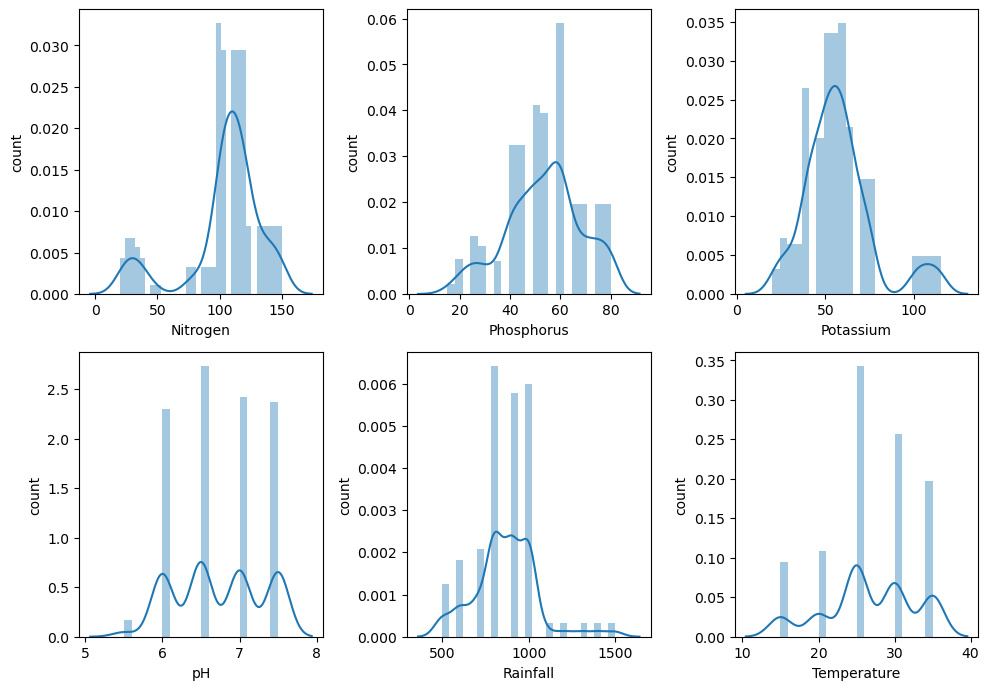

In [304]:
num = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10, 10))
plotnumber = 1
for nums in num:
    if plotnumber <= len(num):
        plt.subplot(3, 3, plotnumber)
        sns.distplot(df[nums].dropna(axis=0))
        plt.xlabel(nums)
        plt.ylabel('count')
        plotnumber += 1

plt.tight_layout()
plt.show()

# Insights
### check distribution: all features are non distribution.

In [305]:
df.drop(df[df['village'] == 'E_Perumalpatti'].index, inplace=True)

In [306]:
df.village.value_counts()

Anaikaraipatti            122
T_Krishnapuram             97
M_Kallupatti               76
Soolapuram                 60
Seelnaickanpatty           51
Chellayeepuram             48
M_Ayyampatti               47
Mallapuram                 44
Allamanaickanpatti         44
Thullukkuttinaickanur      41
E_Peraiyampatti            33
T_Paraipatti               32
Nagamanaickanpatti         26
Kunnuvarpatti              21
E_Perumalpatti             20
Ulaipatti                  20
Mallapuram                 18
M_S_puram                  15
P_Sangaralingapuram        13
Somasundarapuram           12
M_Ayyanarpuram              9
M_Perumalpatti              7
Pappinaickanpatty           7
Meenakshi_Moopanpatti       6
Ulaipatti                   6
Nagamanaicnpatti            4
Sanarpatti                  3
M_Sedapatti                 3
Soolapuram                  2
Nagamannayarakpatti         2
Vittilpatti                 2
Elumalai                    2
Ramasamipuram               2
M_Perumalp

In [307]:
df.village.replace(['Elumalai','Elumalai '] ,'Elumalai', inplace = True)
df.Crop.replace(['cotton','Cotton'],'cotton', inplace = True)

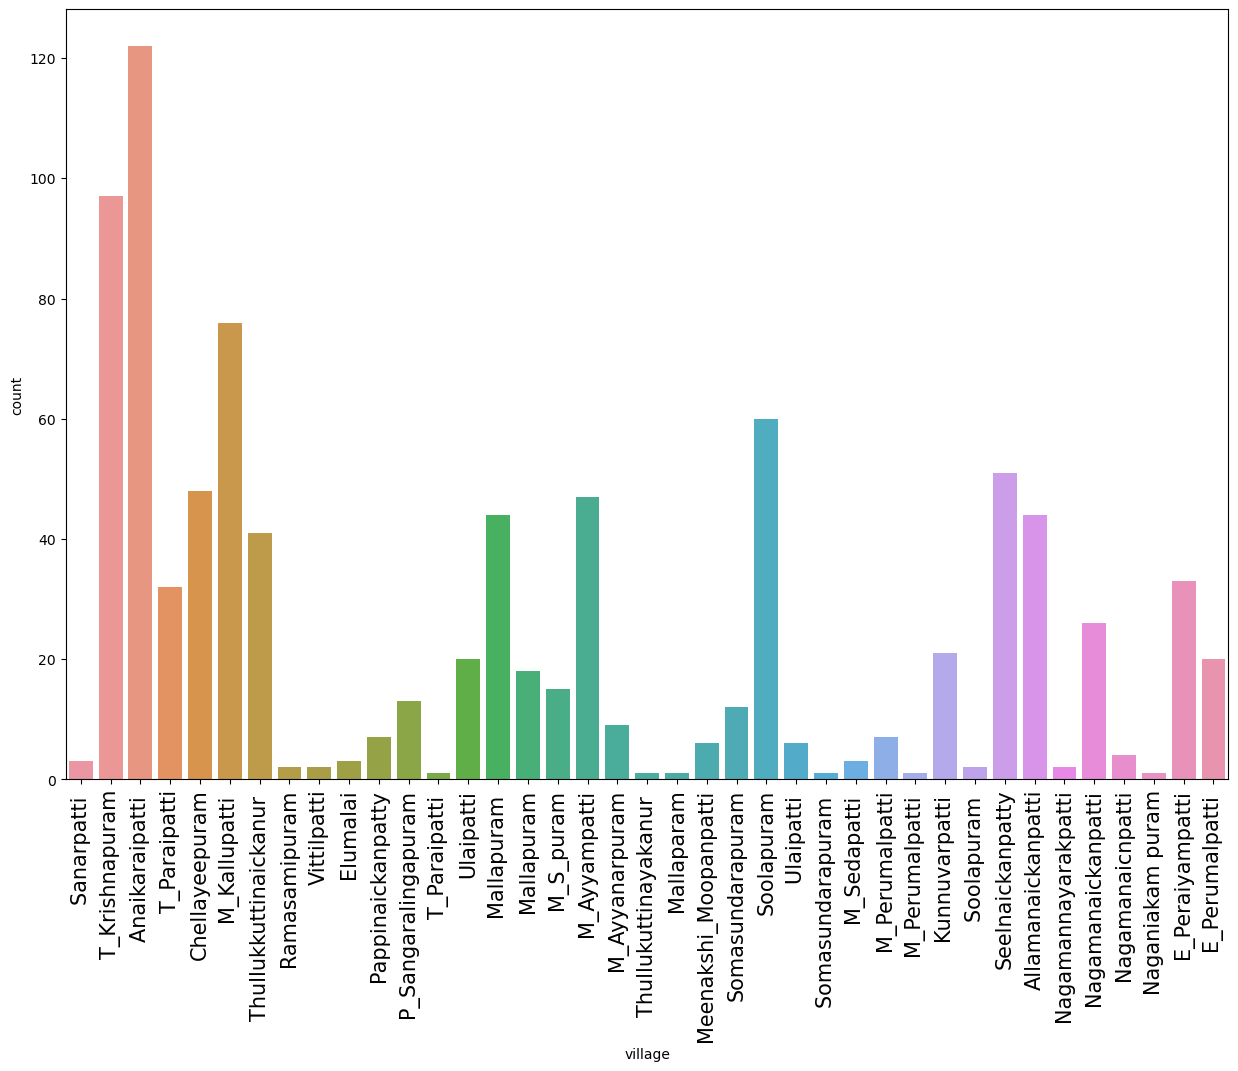

In [308]:
# Village
plt.figure(figsize = (15,10))
sns.countplot(x = 'village', data = df)
plt.xticks(fontsize = 15,rotation = 90)
plt.show()

## Insights
### Anaikaraipatti and krishanapuram is highest and Mallaparam and  t_paraipatti

In [309]:
df.Soil_color.astype('object')

0            red
1            red
2            red
3            red
4            red
         ...    
899          red
900        black
901    alluvial 
902          red
903          NaN
Name: Soil_color, Length: 903, dtype: object

In [310]:
df.Soil_color.value_counts

<bound method IndexOpsMixin.value_counts of 0            red
1            red
2            red
3            red
4            red
         ...    
899          red
900        black
901    alluvial 
902          red
903          NaN
Name: Soil_color, Length: 903, dtype: object>

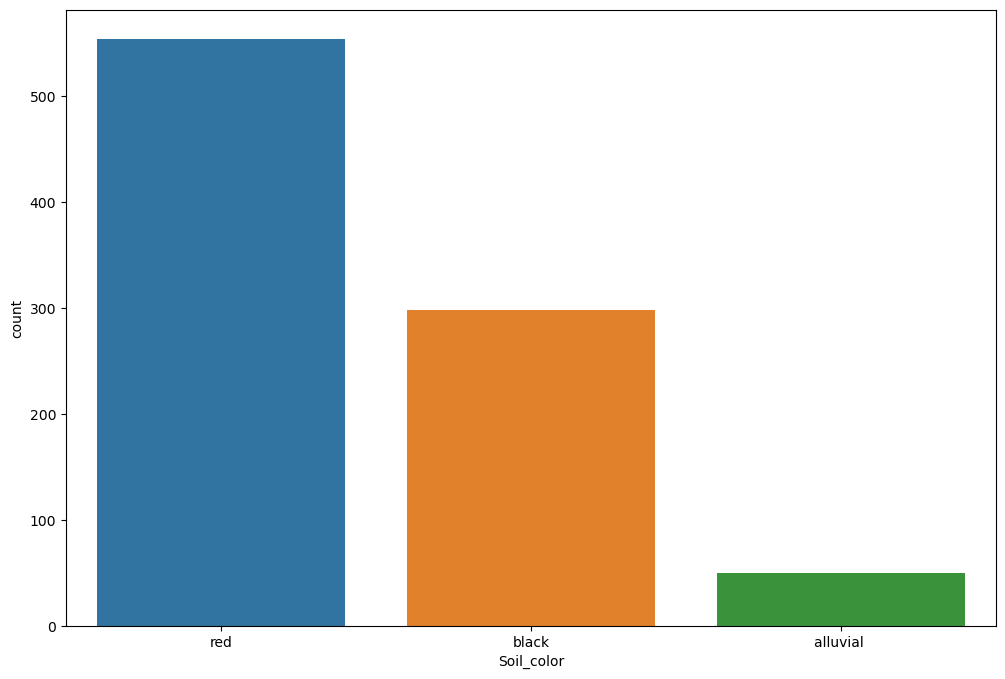

In [311]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'Soil_color',data = df)
plt.show()

## Insights
### red is more

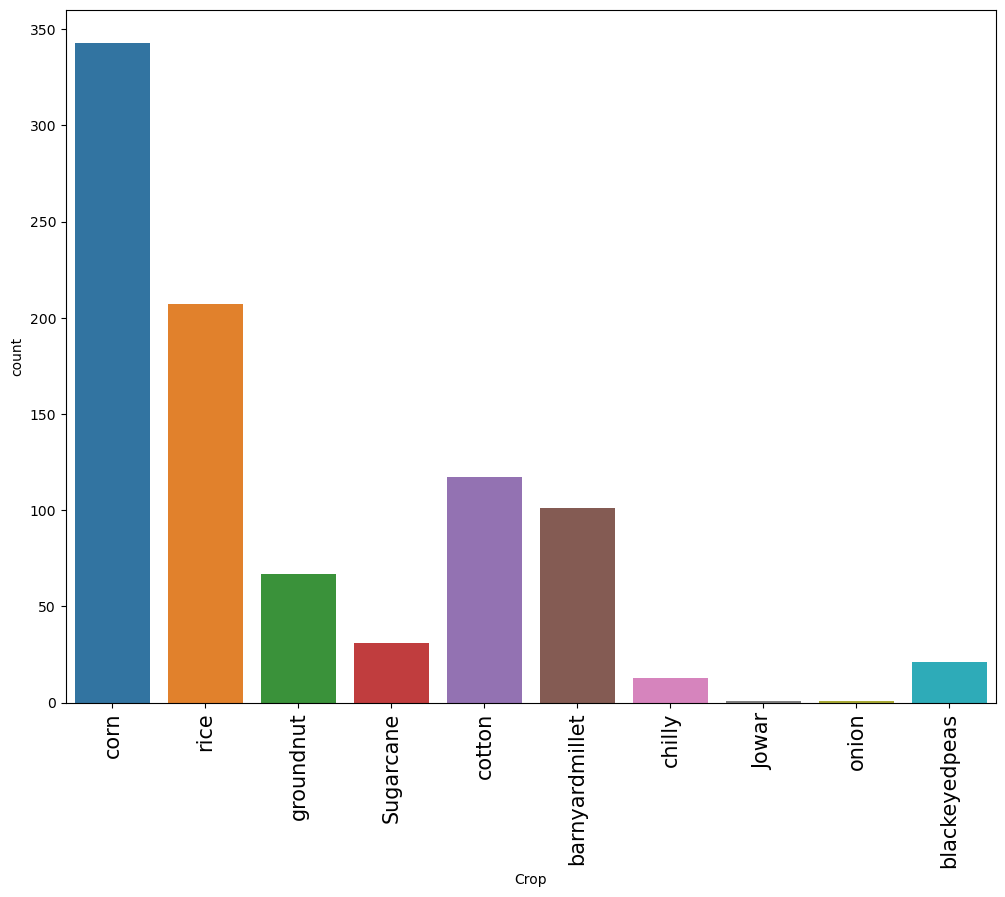

In [312]:
plt.figure(figsize = (12,9))
sns.countplot(x = 'Crop',data = df)
plt.xticks(rotation = 90, fontsize = 15)
plt.show()

## Insights
### Corn and rice is highest and jowar and onion is low

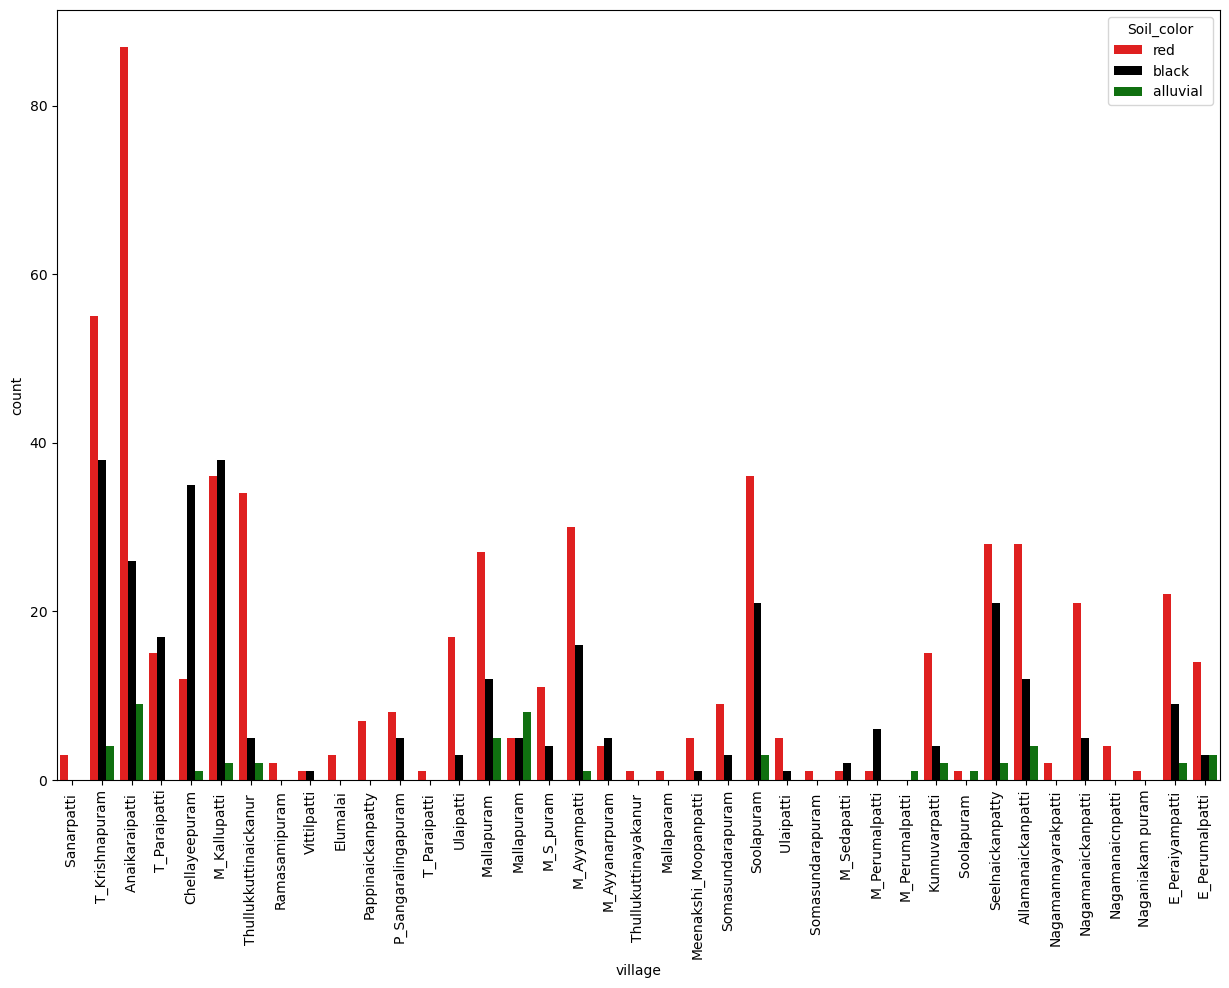

In [313]:
#village * soil
col = ('red','black','green')
plt.figure(figsize = (15,10))
sns.countplot(x = 'village',data = df,hue = 'Soil_color', palette = col)
plt.xticks(rotation = 90)
plt.show()

## Insights
### Every village red soil is more and less alluvil

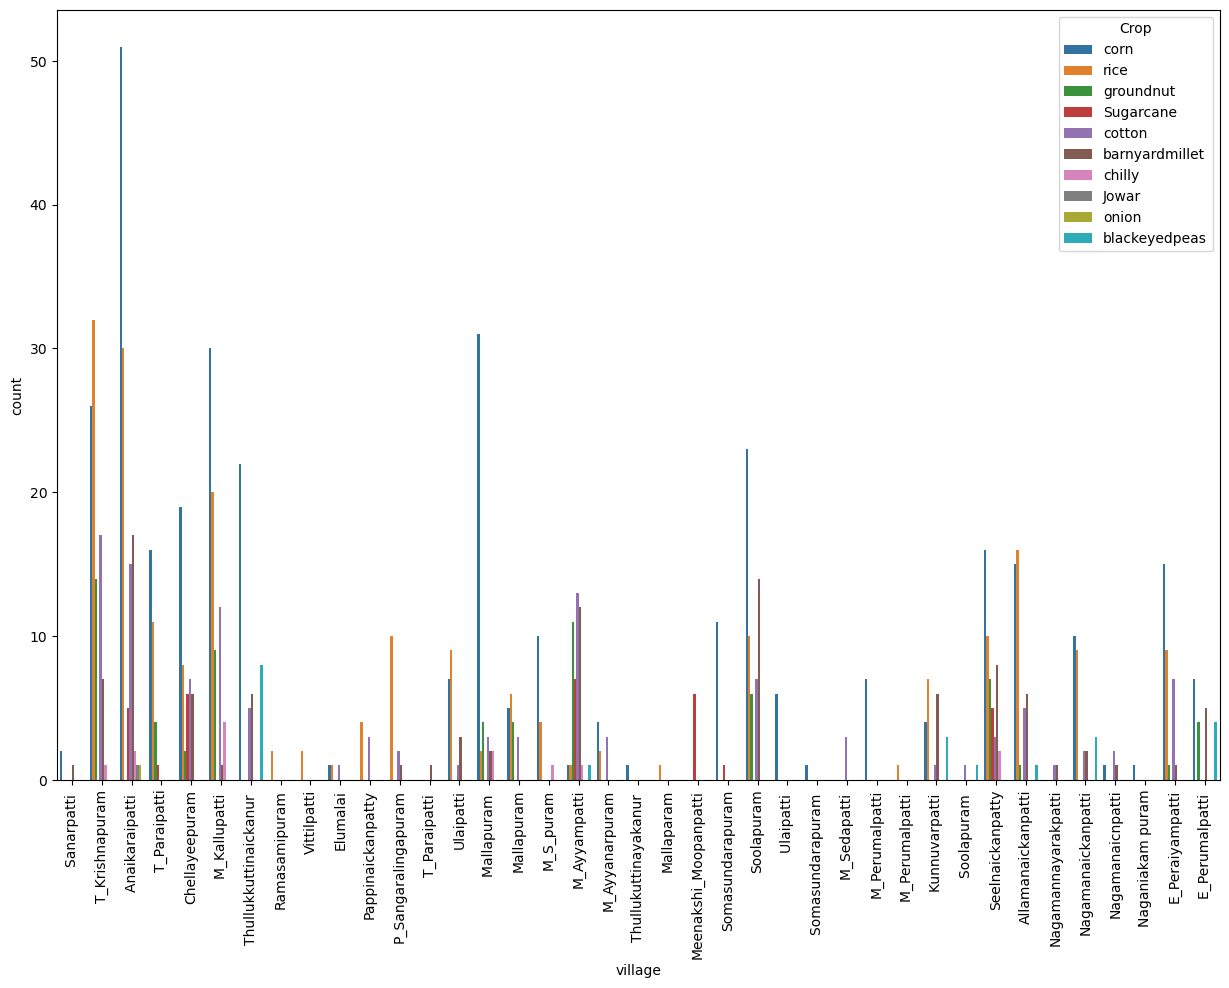

In [314]:
3#village * label
plt.figure(figsize = (15,10))
sns.countplot(x = 'village',data = df,hue = 'Crop')
plt.xticks(rotation = 90)
plt.show()

## Insights
### Every village corn is more and some villafe produce rice only, and least count is blackeyedpeans

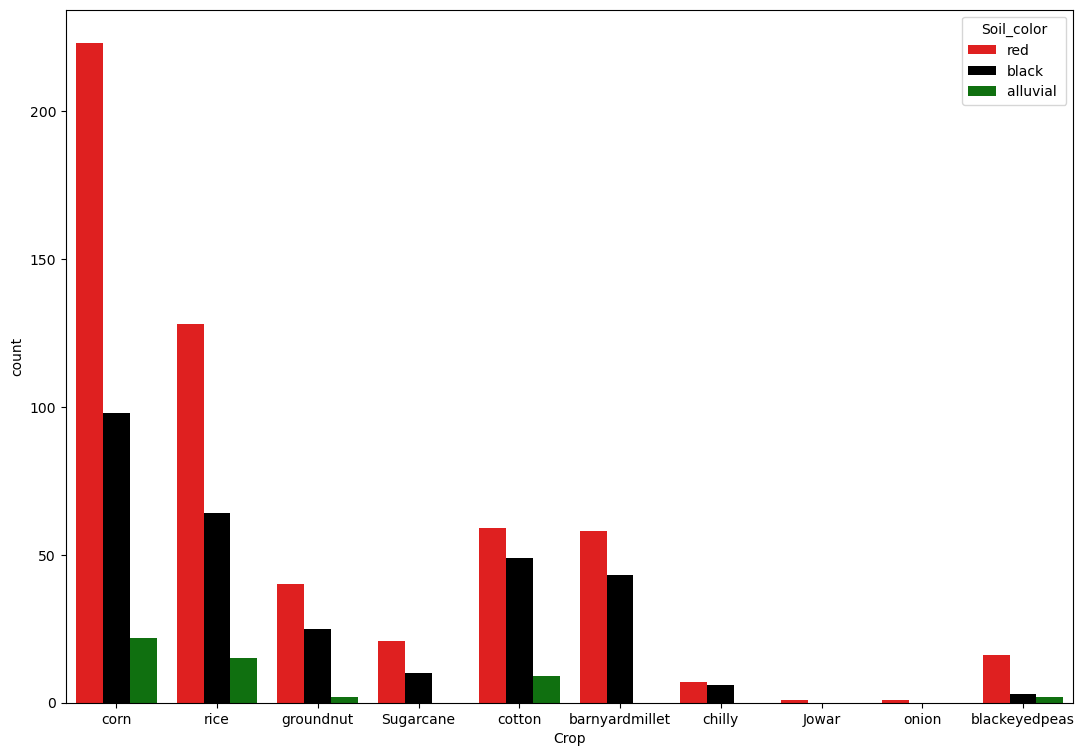

In [315]:
#soil * LAbel
color = ('red','black','green')
plt.figure(figsize = (13,9))
sns.countplot(x = 'Crop',data = df, hue = 'Soil_color', palette = color)
plt.show()

## Insights
### Every crop growth in Red soil, paricuraly corn, and alluvali is less

In [316]:
df.head(2)

,village,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop
0,Sanarpatti,red,75.0,50.0,100.0,6.5,1000.0,20.0,corn
1,Sanarpatti,red,80.0,50.0,100.0,6.5,1000.0,20.0,corn


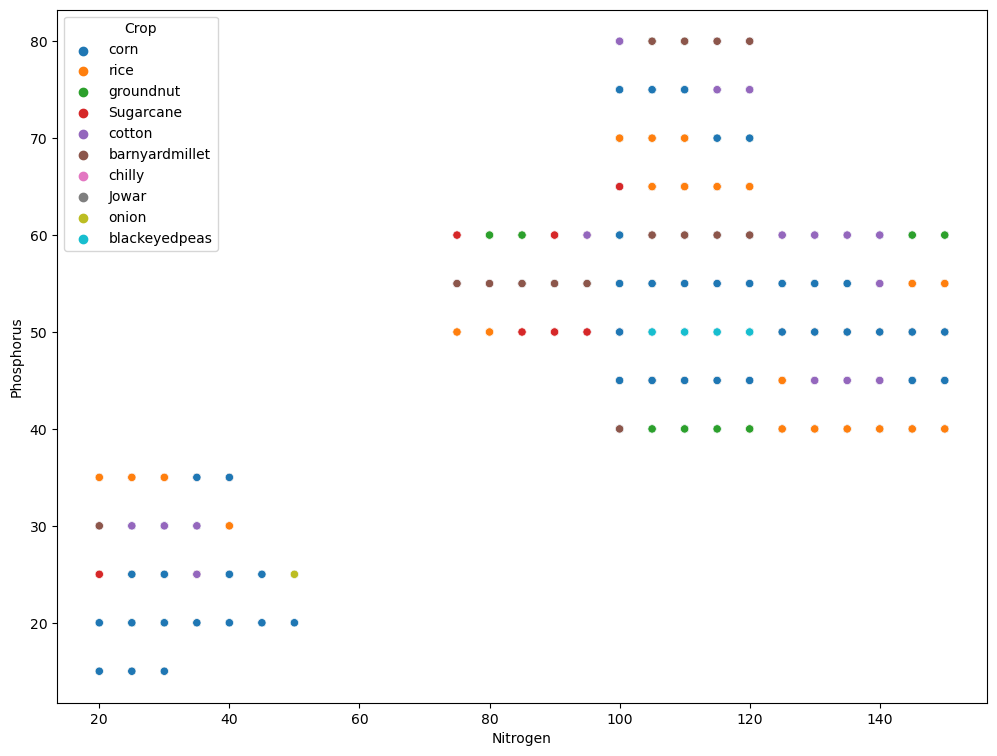

In [317]:
# Nitrogen * phosphorus
plt.figure(figsize = (12,9))
sns.scatterplot(x = 'Nitrogen',y = 'Phosphorus', data = df,hue = 'Crop')
plt.show()

## Insights barmyarmillet
### low Nitrogen and low phosphorus more corn produced , and more nitrogen and more phosphorus  producrd cotton and  barmyarmillet

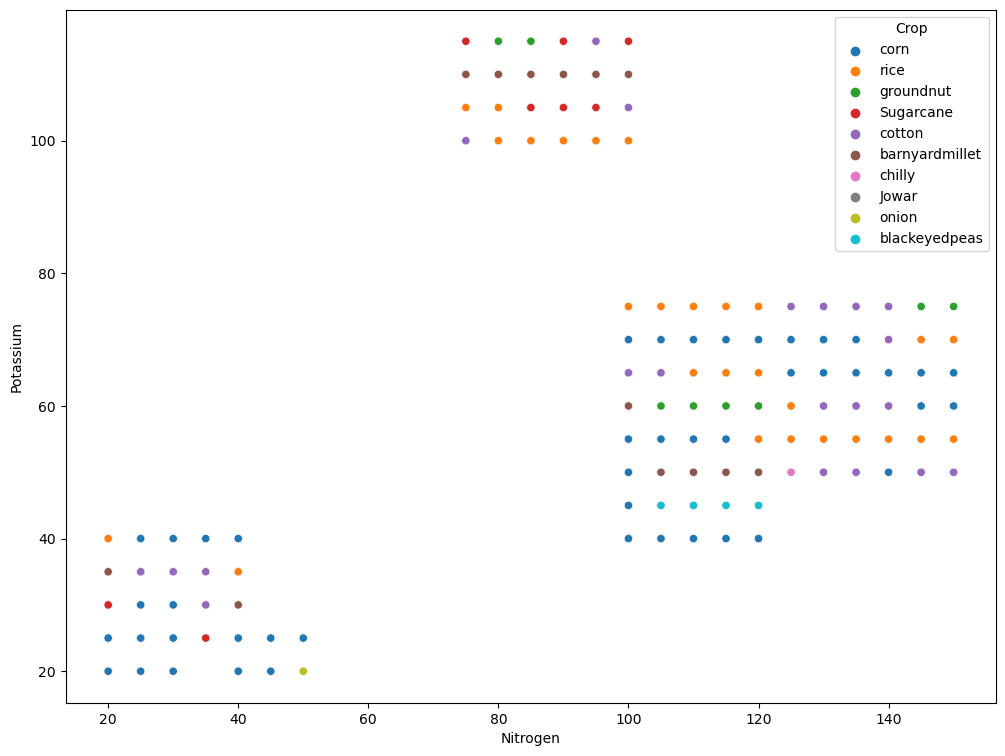

In [318]:
#Nitrogen * Potassium
plt.figure(figsize = (12,9))
sns.scatterplot(x = 'Nitrogen',y = 'Potassium', data = df,hue = 'Crop')
plt.show()

## Insights
### less nitrogen and less potassium produced more corn and high is rice

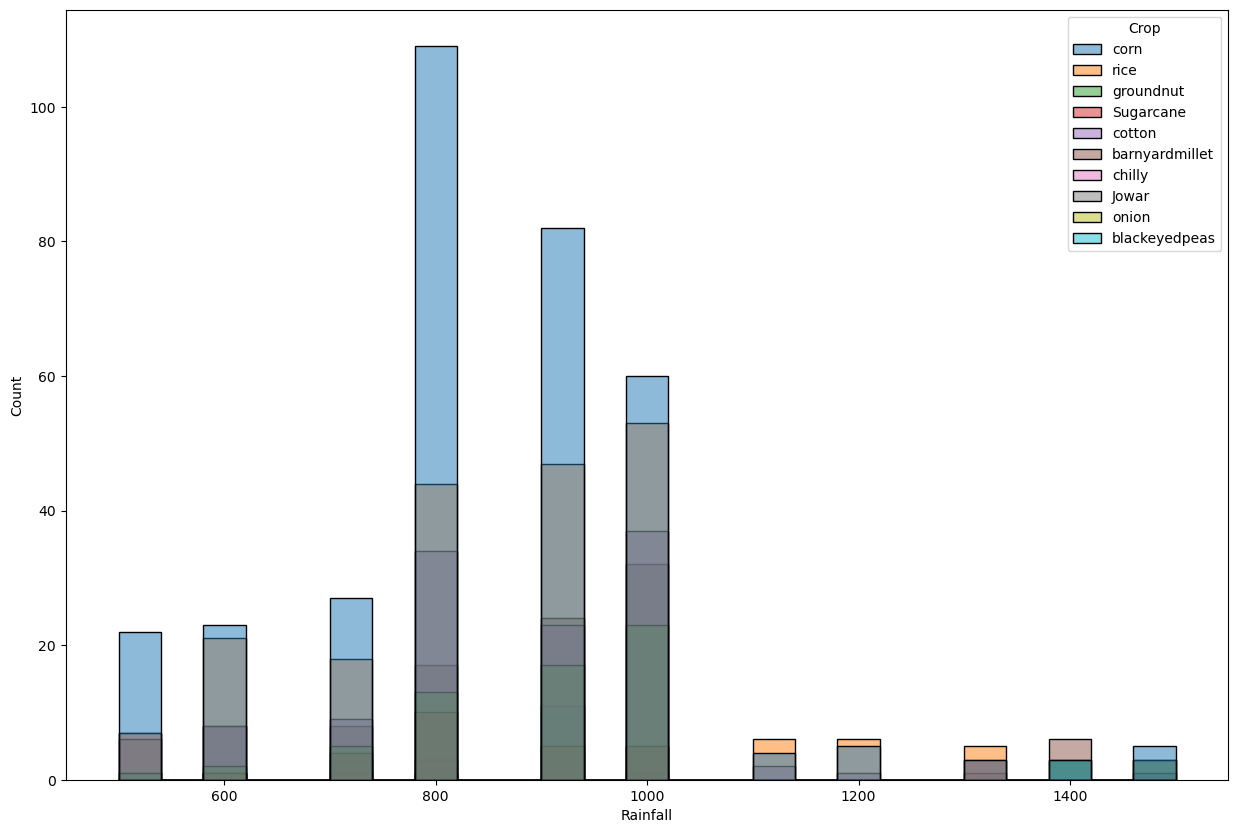

In [319]:
# label * Rainfall
plt.figure(figsize = (15,10))
sns.histplot(x = 'Rainfall', data = df,hue = 'Crop')
plt.show()


## Insights
### 100 to 1000 rainfall is due to produce cotton and jowar more but above 1000 rainfall rice and jowar and barnyardmillet is more

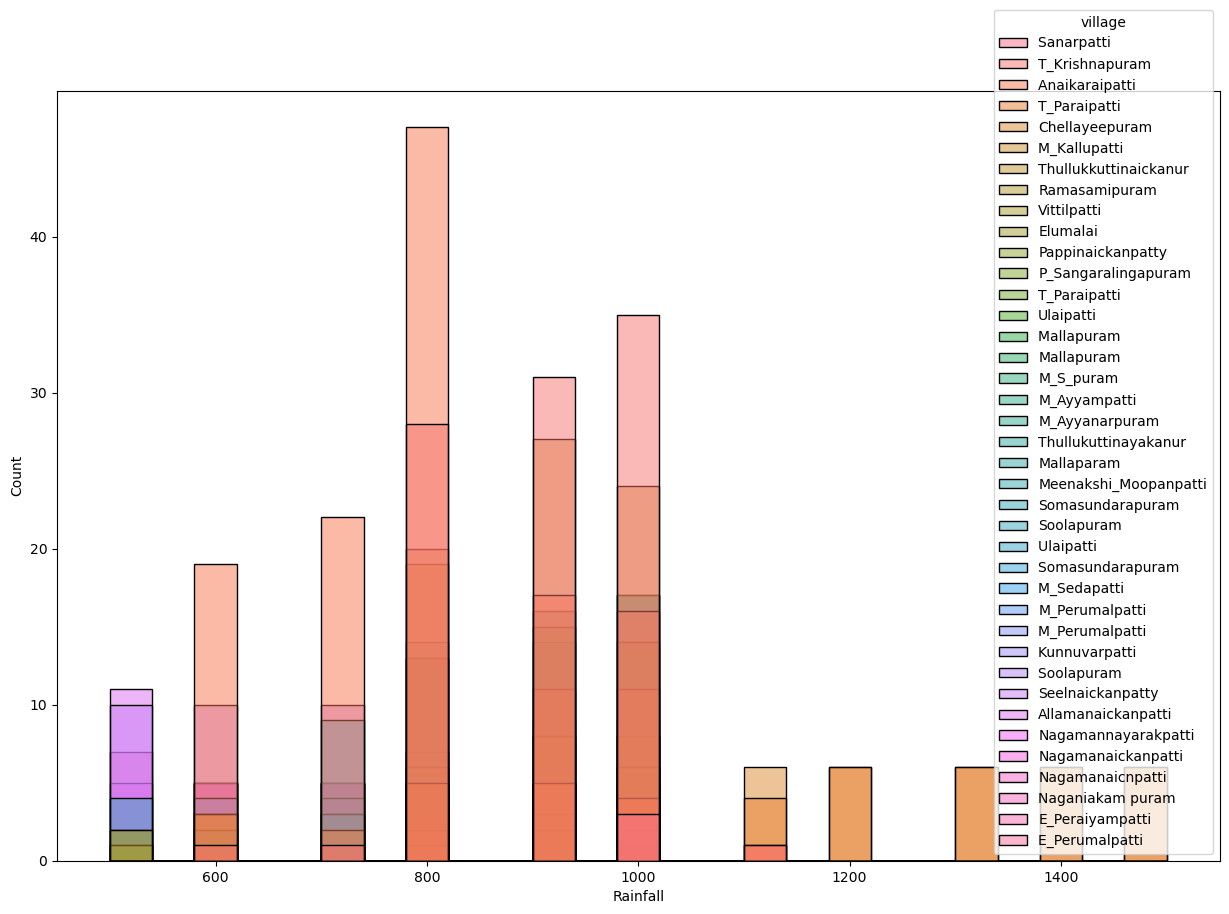

In [320]:
#village * rainfall
plt.figure(figsize = (15,10))
sns.histplot(x = 'Rainfall', data = df,hue = 'village')
plt.show()

## Insights
### more rainfall in Anaikaranpattiand saranpatti]

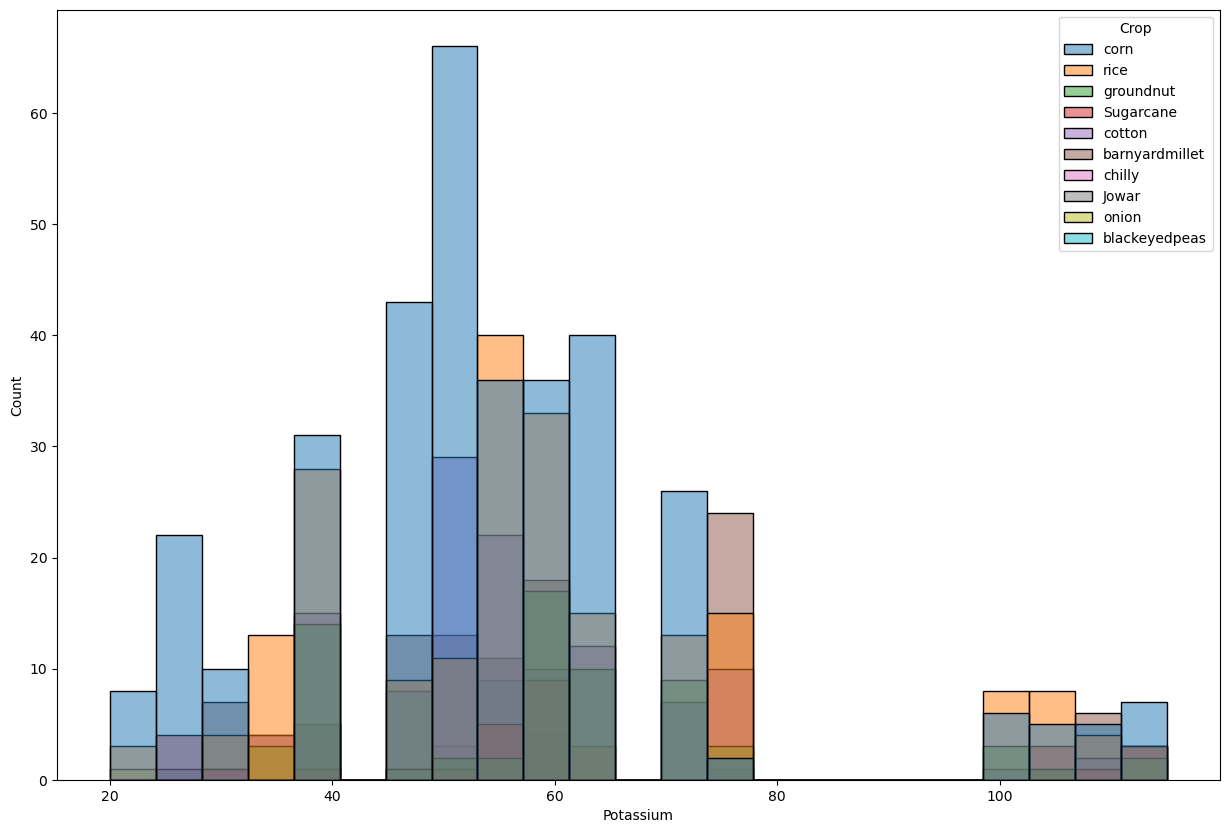

In [321]:
# Potassium * corn
plt.figure(figsize = (15,10))
sns.histplot(x = 'Potassium', data = df,hue = 'Crop')
plt.show()

## Insights
### potassium less for corn and rice more used in jowar and rice

# preprocessing

In [322]:
df.duplicated().sum()

0

In [323]:
df.isnull().sum()

village        1
Soil_color     1
Nitrogen       1
Phosphorus     1
Potassium      1
pH             1
Rainfall       1
Temperature    1
Crop           1
dtype: int64

In [324]:
df1 = df.copy()

In [325]:
df1


,village,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop
0,Sanarpatti,red,75.0,50.0,100.0,6.5,1000.0,20.0,corn
1,Sanarpatti,red,80.0,50.0,100.0,6.5,1000.0,20.0,corn
2,T_Krishnapuram,red,85.0,50.0,100.0,6.5,1000.0,20.0,rice
3,T_Krishnapuram,red,90.0,50.0,100.0,6.5,1000.0,20.0,rice
4,T_Krishnapuram,red,95.0,50.0,100.0,6.5,1000.0,20.0,corn
...,...,...,...,...,...,...,...,...,...
899,E_Perumalpatti,red,105.0,50.0,45.0,7.0,900.0,20.0,blackeyedpeas
900,E_Perumalpatti,black,110.0,50.0,45.0,7.0,900.0,20.0,blackeyedpeas
901,E_Perumalpatti,alluvial,115.0,50.0,45.0,7.0,900.0,20.0,blackeyedpeas
902,E_Perumalpatti,red,120.0,50.0,45.0,7.0,900.0,20.0,blackeyedpeas


In [326]:
df.loc[df['village'].isnull() == True,'village']

903    NaN
Name: village, dtype: object

In [327]:
df.drop(903, inplace=True)

# Encoding

In [328]:
df.Soil_color.value_counts()

red          554
black        298
alluvial      50
Name: Soil_color, dtype: int64

In [329]:
df.replace({'red':1,"black":2,"alluvial ":3},inplace = True)

In [330]:
df

,village,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop
0,Sanarpatti,1,75.0,50.0,100.0,6.5,1000.0,20.0,corn
1,Sanarpatti,1,80.0,50.0,100.0,6.5,1000.0,20.0,corn
2,T_Krishnapuram,1,85.0,50.0,100.0,6.5,1000.0,20.0,rice
3,T_Krishnapuram,1,90.0,50.0,100.0,6.5,1000.0,20.0,rice
4,T_Krishnapuram,1,95.0,50.0,100.0,6.5,1000.0,20.0,corn
...,...,...,...,...,...,...,...,...,...
898,E_Perumalpatti,1,100.0,50.0,45.0,7.0,900.0,20.0,corn
899,E_Perumalpatti,1,105.0,50.0,45.0,7.0,900.0,20.0,blackeyedpeas
900,E_Perumalpatti,2,110.0,50.0,45.0,7.0,900.0,20.0,blackeyedpeas
901,E_Perumalpatti,3,115.0,50.0,45.0,7.0,900.0,20.0,blackeyedpeas


In [331]:
df.Crop.astype('object')

0               corn
1               corn
2               rice
3               rice
4               corn
           ...      
898             corn
899    blackeyedpeas
900    blackeyedpeas
901    blackeyedpeas
902    blackeyedpeas
Name: Crop, Length: 902, dtype: object

In [332]:
df.drop(['village'],axis = 1,inplace = True)

In [333]:
df.head(2)

,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop
0,1,75.0,50.0,100.0,6.5,1000.0,20.0,corn
1,1,80.0,50.0,100.0,6.5,1000.0,20.0,corn


In [334]:
df.replace({'corn':0,'rice':1,'cotton':2,'barnyardmillet':3,'groundnut':4,'Sugarcane':5,'blackeyedpeas':6,'chilly':7,'Jowar':8,'onion':9},inplace = True)

# split


In [335]:
x = df.drop('Crop',axis = 1)
y = df['Crop']

In [336]:
x.head()

,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature
0,1,75.0,50.0,100.0,6.5,1000.0,20.0
1,1,80.0,50.0,100.0,6.5,1000.0,20.0
2,1,85.0,50.0,100.0,6.5,1000.0,20.0
3,1,90.0,50.0,100.0,6.5,1000.0,20.0
4,1,95.0,50.0,100.0,6.5,1000.0,20.0


In [337]:
y.head()

0    0
1    0
2    1
3    1
4    0
Name: Crop, dtype: int64

In [338]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 902 entries, 0 to 902
Series name: Crop
Non-Null Count  Dtype
--------------  -----
902 non-null    int64
dtypes: int64(1)
memory usage: 14.1 KB


In [339]:
y.value_counts()

0    343
1    207
2    117
3    101
4     67
5     31
6     21
7     13
8      1
9      1
Name: Crop, dtype: int64

In [340]:
from sklearn.model_selection import train_test_split

In [341]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [342]:
x_train.shape

(721, 7)

In [343]:
y_test.shape

(181,)

# model ceation

In [344]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(x_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [345]:
pred = xg.predict(x_test)
a = accuracy_score(y_test,pred)
print(a)

0.8176795580110497
